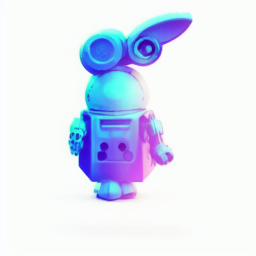

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

img = cv2.imread('generated/bunny/color/output_0000_0010.png')
img = cv2.resize(img, (256, 256))
Image.fromarray(img[...,::-1])

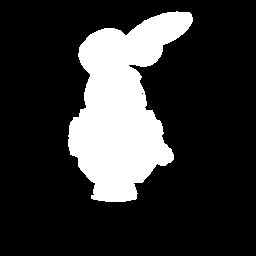

In [2]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsvLower = np.array([0, 0, 240])
hsvUpper = np.array([180, 15, 255])
mask = cv2.inRange(hsv, hsvLower, hsvUpper)
mask = cv2.bitwise_not(mask)
Image.fromarray(mask)

In [3]:
from glob import glob
from tqdm import tqdm
import os

name = 'bowl'
os.makedirs(f'generated/{name}/alpha', exist_ok=True)
for path in tqdm(sorted(glob(f'generated/{name}/color/*'))):
    img = cv2.imread(path)
    img = cv2.resize(img, (256, 256))
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsvLower = np.array([0, 0, 240])
    hsvUpper = np.array([180, 15, 255])
    mask = cv2.inRange(hsv, hsvLower, hsvUpper)
    mask = cv2.bitwise_not(mask)
    cv2.imwrite(path.replace('color', 'alpha'), mask)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 960/960 [00:02<00:00, 379.61it/s]
